In [ ]:
#libraries to be imported
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [ ]:
#libraries to be imported
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import  WordCloud

In [ ]:
df=pd.read_excel('/content/Scraping_reviews2.xlsx')

In [ ]:
df.head()

,reviews
0,\nI have purchased these shoes many times for ...
1,"\nThese are nice shoes, and are of typical Nik..."
2,\nLooks are great. Very comfortable\n
3,\nI bought these for my husband and every-time...
4,\nVery nice sneaker. Fits well. Lightweight.\n


In [ ]:
#function to preprocess/clean the data
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#to store data into column after cleaning
df['cleanRevviews']=df['reviews'].map(lambda s:preprocess(s))

In [ ]:
df.to_csv(r'cleaned_amazon_reviews.csv', index = False) #store file having cleaned data

In [ ]:
df=pd.read_csv('cleaned_amazon_reviews.csv') #read file of cleaned data
df.head()

,reviews,cleanRevviews
0,\nI have purchased these shoes many times for ...,purchased shoes many times husband past price ...
1,"\nThese are nice shoes, and are of typical Nik...",nice shoes typical nike quality fit well true ...
2,\nLooks are great. Very comfortable\n,looks great comfortable
3,\nI bought these for my husband and every-time...,bought husband every time wears walking says b...
4,\nVery nice sneaker. Fits well. Lightweight.\n,nice sneaker fits well lightweight


In [ ]:
df.drop(columns = ['reviews'],inplace=True)

In [ ]:
df.head()

,cleanRevviews
0,purchased shoes many times husband past price ...
1,nice shoes typical nike quality fit well true ...
2,looks great comfortable
3,bought husband every time wears walking says b...
4,nice sneaker fits well lightweight


In [ ]:
df.isnull().sum()

cleanRevviews    156
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,cleanRevviews
0,purchased shoes many times husband past price ...
1,nice shoes typical nike quality fit well true ...
2,looks great comfortable
3,bought husband every time wears walking says b...
4,nice sneaker fits well lightweight
...,...
10322,buena zapatilla entrenamieno
10323,bonjour monsieur madame bien recu cette comman...
10324,looks good quality
10325,perfect


In [ ]:
#function for subjectivity and polarity calculation
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity']=df['cleanRevviews'].apply(getSubjectivity)


In [ ]:
df['Polarity']=df['cleanRevviews'].apply(getPolarity)

In [ ]:
def GetAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
#annotating the data
df['Sen_tag']=df['Polarity'].apply(GetAnalysis)
df.head()

,cleanRevviews,Subjectivity,Polarity,Sen_tag
0,purchased shoes many times husband past price ...,0.441342,0.037662,Positive
1,nice shoes typical nike quality fit well true ...,0.637500,0.295833,Positive
2,looks great comfortable,0.775000,0.600000,Positive
3,bought husband every time wears walking says b...,0.300000,1.000000,Positive
4,nice sneaker fits well lightweight,1.000000,0.600000,Positive


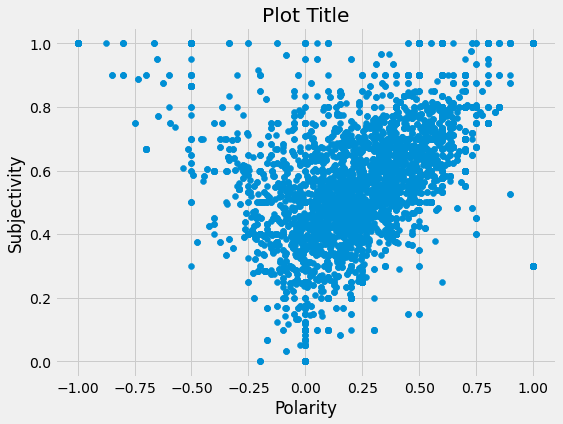

In [ ]:
#graph ploting between polarity and subjectivity
plt.figure(figsize=(8,6))
#for i in range(0,df.shape[0]):

plt.scatter(df['Polarity'],df['Subjectivity'])
plt.title('Plot Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

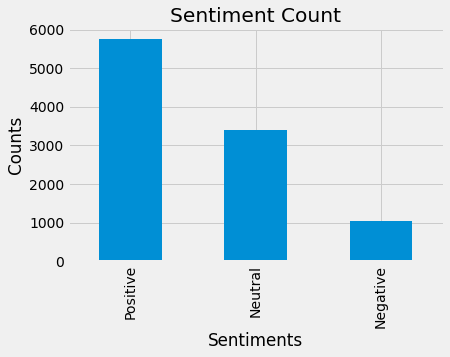

In [ ]:
#graph for sentiment display
df['Sen_tag'].value_counts()
plt.title('Sentiment Count')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Sen_tag'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x = df[['Subjectivity','Polarity']]
x


,Subjectivity,Polarity
0,0.441342,0.037662
1,0.637500,0.295833
2,0.775000,0.600000
3,0.300000,1.000000
4,1.000000,0.600000
...,...,...
10322,0.000000,0.000000
10323,0.000000,0.000000
10324,0.600000,0.700000
10325,1.000000,1.000000


In [ ]:
y=df['Sen_tag']
y

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
10322     Neutral
10323     Neutral
10324    Positive
10325    Positive
10326     Neutral
Name: Sen_tag, Length: 10171, dtype: object

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_test,y_test)


0.9937745740498034